# Data Scientist id/x Partnerts Virtual Internship Final Assignment

### Business Problem 
A client (Lending company) want to mitigate risk from possibility of a loss from a borrowers's failure to repay a loan or meet contractual obligation

### Objective
Create a machine learning model to predict customer credit risk using dataset from id/x partners and prepare a visual media/analysis report to communicate the data to the client

### Outline
1. Import Modules & Data
2. Data Cleaning & Data Manipulation
3. Exploratory Data Analysis
4. Building Machine Learning Model
5. Training & Testing Model
6. Model Evaluation

### 1. Import Modules & Load Data

### 1.1 Import Python Modules

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# setting max rows & cols display on jupyterlab
from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = 10

In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


### 1.2 Load Dataset

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Data/loan_data_2007_2014.csv')

In [9]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [11]:
df.shape

(466285, 75)

### 2. Data Cleaning
#### Objectives
- Remove Data from Unused Features
- Drop / Replace Missing Values
- Transform data into desirable data for analysis

### 2.1 Remove Unused Feature

In [12]:
# filter data from unused features
df_filter = df[[
    'funded_amnt',        #The total amount committed to that loan at that point in time.
    'term',               #The number of payments on the loan. Values are in months and can be either 36 or 60.
    'grade',              #LC assigned loan grade      
    'emp_length',         #Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
    'home_ownership',     #The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
    'annual_inc',         #The self-reported annual income provided by the borrower during registration.
    'purpose',            #A category provided by the borrower for the loan request. 
    'open_acc',           #The number of open credit lines in the borrower's credit file.
    'installment',        #The monthly payment owed by the borrower if the loan originates.
    'loan_status'         #Current status of the loan   
    ]]              


In [13]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   funded_amnt     466285 non-null  int64  
 1   term            466285 non-null  object 
 2   grade           466285 non-null  object 
 3   emp_length      445277 non-null  object 
 4   home_ownership  466285 non-null  object 
 5   annual_inc      466281 non-null  float64
 6   purpose         466285 non-null  object 
 7   open_acc        466256 non-null  float64
 8   installment     466285 non-null  float64
 9   loan_status     466285 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 35.6+ MB


### 2.2 Drop / Replace Missing Values

In [14]:
# check any missing values
df_filter.isnull().sum()

funded_amnt           0
term                  0
grade                 0
emp_length        21008
home_ownership        0
annual_inc            4
purpose               0
open_acc             29
installment           0
loan_status           0
dtype: int64

In [15]:
# drop missing values
df_filter= df_filter.dropna()

In [16]:
# check any missing values
df_filter.isnull().sum()

funded_amnt       0
term              0
grade             0
emp_length        0
home_ownership    0
annual_inc        0
purpose           0
open_acc          0
installment       0
loan_status       0
dtype: int64

### 2.3 Transform Data

In [17]:
# check number of rows & columns of data
df_filter.shape

(445248, 10)

In [29]:
# transform loan_status into loan_status_num with 0 (Credit risk low) & 1 (Credit risk high) value
df_filter['credit_risk'] = df_filter['loan_status'].replace(['Fully Paid', 'Current', 
                                                             'Does not meet the credit policy. Status:Fully Paid'], 'low').replace(
    ['Charged Off', 'Late (31-120 days)','In Grace Period','Default', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off'], 'high')

# convert open_acc datatype into int
df_filter['open_acc'] = df_filter['open_acc'].astype('int64')

# convert installment datatype into int
df_filter['installment'] = df_filter['installment'].astype('int64')

### 3. Exploratory Data Analysis

#### Objectives 
* Visualize Distributions of numerical values
* Visualize Frequency of Categorical Values
* Visualize Distribution Loan Status
* Further Visualization

In [31]:
# create function
def distinct_values(x):
    print(x)
    print(df_filter[x].value_counts())
    
# print object values
distinct_values('emp_length')
distinct_values('grade')
distinct_values('term')
distinct_values('grade')
distinct_values('home_ownership')
distinct_values('purpose')
distinct_values('loan_status')

emp_length
10+ years    150046
2 years       41372
3 years       36594
< 1 year      36247
5 years       30774
              ...  
4 years       28023
7 years       26180
6 years       26111
8 years       22395
9 years       17887
Name: emp_length, Length: 11, dtype: int64
grade
B    130790
C    119463
D     73198
A     71773
E     34137
F     12678
G      3209
Name: grade, dtype: int64
term
 36 months    320728
 60 months    124520
Name: term, dtype: int64
grade
B    130790
C    119463
D     73198
A     71773
E     34137
F     12678
G      3209
Name: grade, dtype: int64
home_ownership
MORTGAGE    226005
RENT        181001
OWN          38017
OTHER          179
NONE            45
ANY              1
Name: home_ownership, dtype: int64
purpose
debt_consolidation    262853
credit_card            98963
home_improvement       25017
other                  22292
major_purchase          9385
                       ...  
vacation                2326
wedding                 2311
house             

In [32]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445248 entries, 0 to 466284
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   funded_amnt     445248 non-null  int64  
 1   term            445248 non-null  object 
 2   grade           445248 non-null  object 
 3   emp_length      445248 non-null  object 
 4   home_ownership  445248 non-null  object 
 5   annual_inc      445248 non-null  float64
 6   purpose         445248 non-null  object 
 7   open_acc        445248 non-null  int64  
 8   installment     445248 non-null  int64  
 9   loan_status     445248 non-null  object 
 10  credit_risk     445248 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 56.9+ MB


### 3.1 Visualize Distributions of Numerical Data

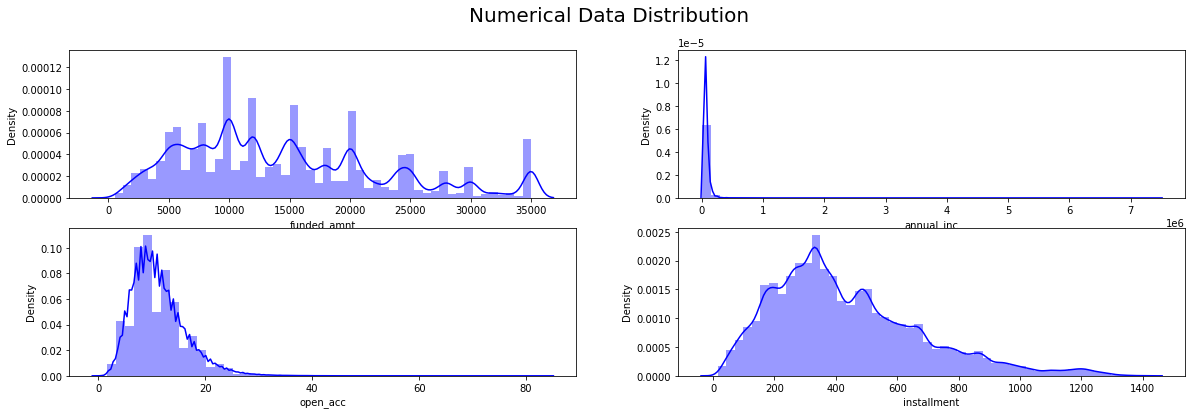

In [22]:
def hist(x, y, z):
    sns.distplot(df_filter[x], color='b', ax=ax[y, z])

#create custom function
fig, ax = plt.subplots(2, 2, figsize=(20, 6))
plt.suptitle('Numerical Data Distribution', size = 20)

hist('funded_amnt', 0, 0)
hist('annual_inc', 0, 1)
hist('open_acc', 1, 0)
hist('installment', 1, 1)

plt.show()

### 3.2 Visualize Frequencey of Categorical / Discrete Data

In [23]:
df_filter['term'].value_counts()

 36 months    320728
 60 months    124520
Name: term, dtype: int64

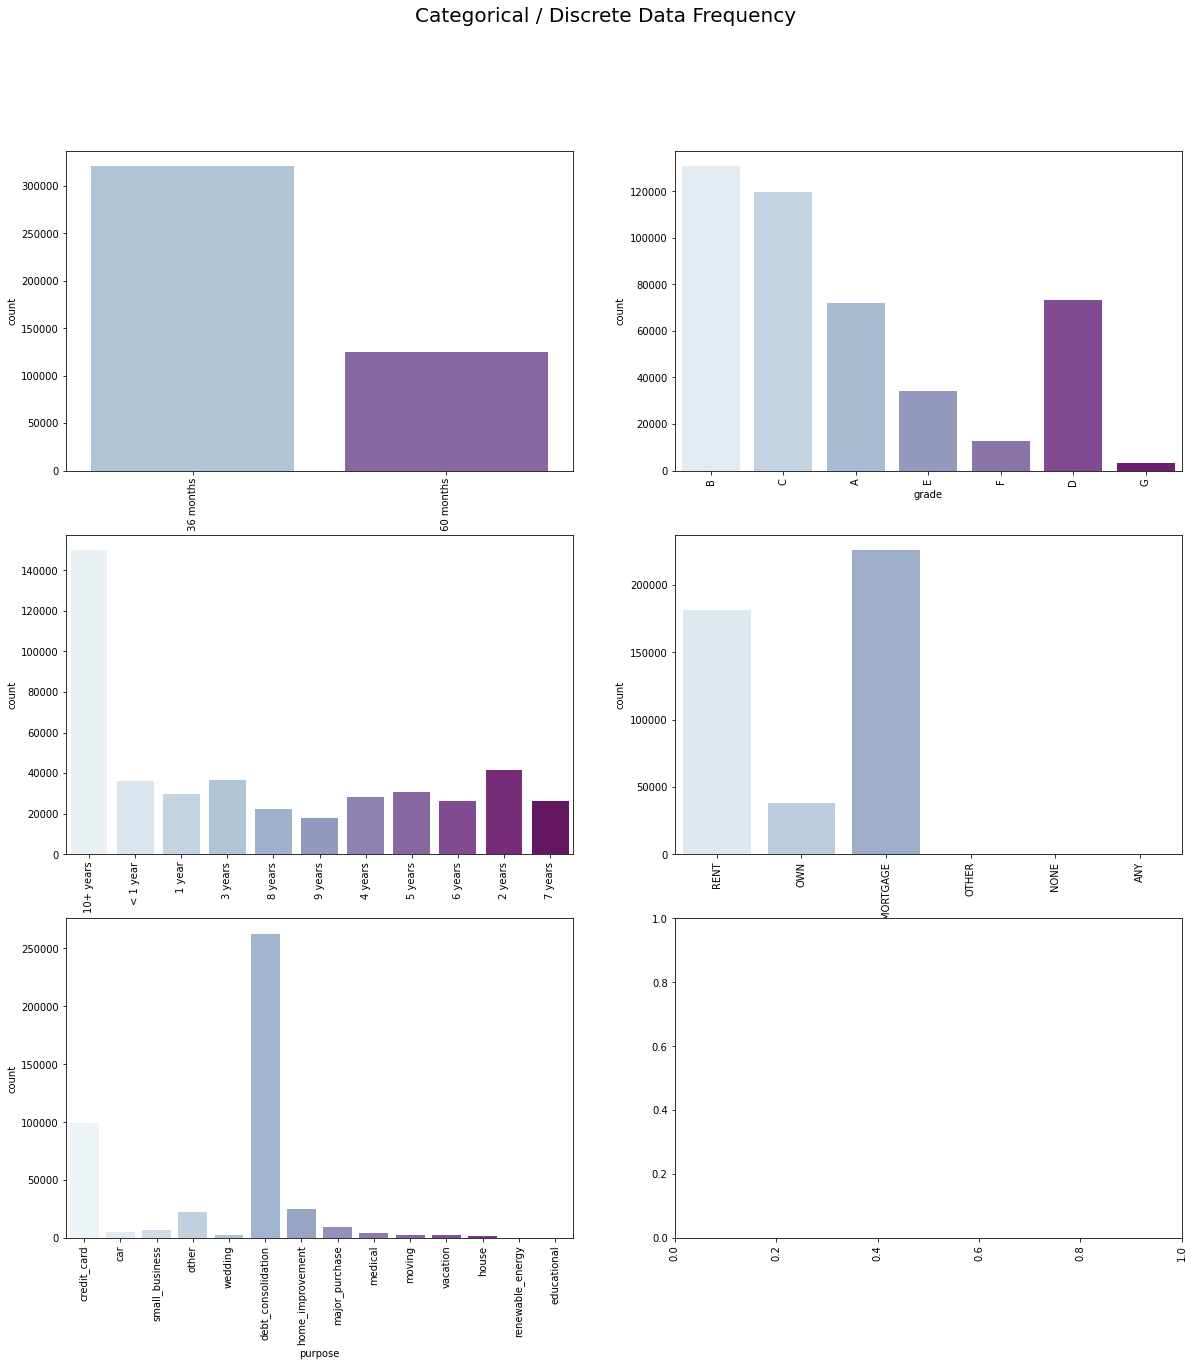

In [24]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
plt.suptitle('Categorical / Discrete Data Frequency', size = 20)

#create custom function
def countplot(x, y, z):
    sns.countplot(df_filter[x], palette='BuPu', ax=ax[y, z])

countplot('term', 0, 0)
countplot('grade',0, 1)
countplot('emp_length', 1,0)
countplot('home_ownership', 1, 1)
countplot('purpose', 2,0)

for ax in ax.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 90)

### 3.3 Further Visualizations

#### Loan Status (Target Variables)

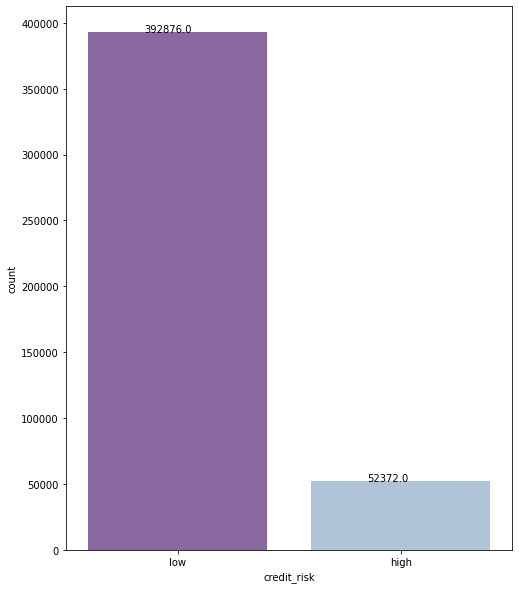

In [33]:
plt.figure(figsize=(8, 10))

# create custom function
ax = sns.countplot(x = df_filter['credit_risk'], palette = 'BuPu_r')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

### Which Data Most Affected Loan Status (Target Variable) ?

#### Loan Status Vs Numerical Data Distribution

In [27]:
df_filter['credit_risk'].value_counts()

low                                                    390933
high                                                    50480
Does not meet the credit policy. Status:Fully Paid       1943
Late (16-30 days)                                        1149
Does not meet the credit policy. Status:Charged Off       743
Name: credit_risk, dtype: int64

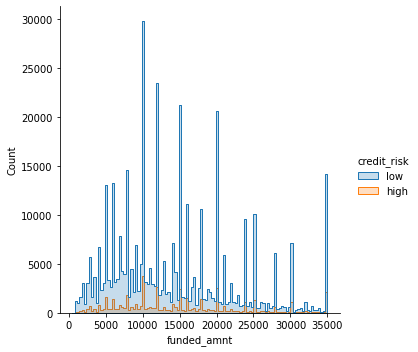

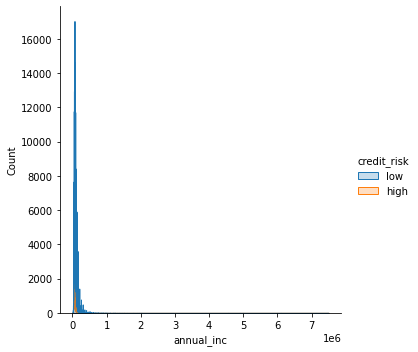

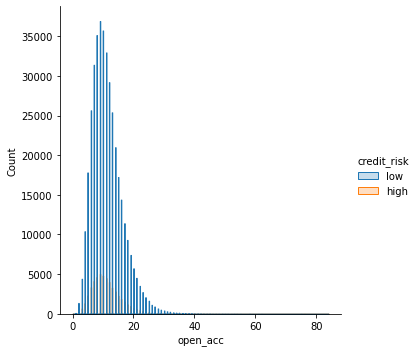

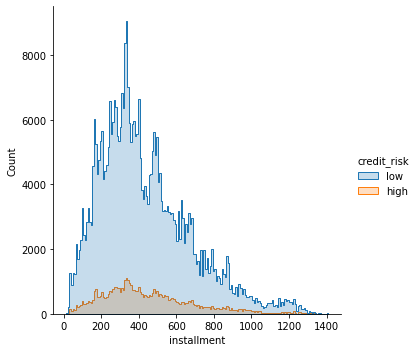

In [34]:
def hist_loanstat(x, y, z):
    sns.displot(df_filter, x=x, hue='credit_risk', color='b', element='step')

hist_loanstat('funded_amnt', 0, 0)
hist_loanstat('annual_inc', 0, 1)
hist_loanstat('open_acc', 1, 0)
hist_loanstat('installment', 1, 1)

### Loan Status Vs Categorical Data Distribution

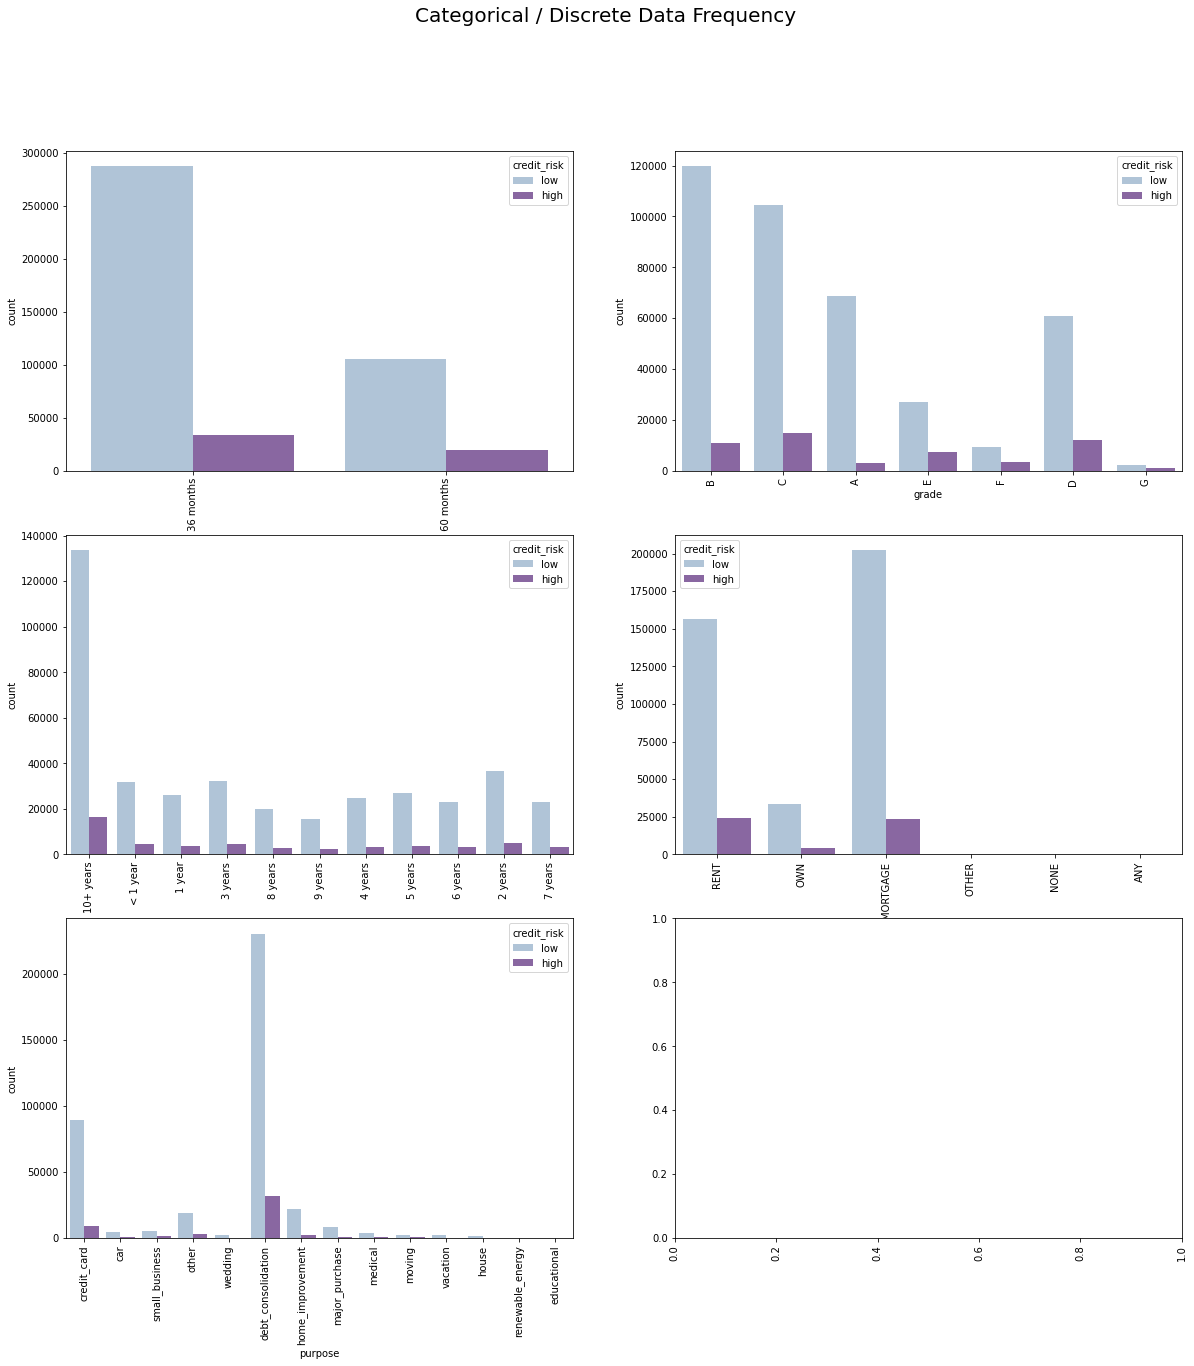

In [35]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
plt.suptitle('Categorical / Discrete Data Frequency', size = 20)

#create custom function
def countplot(x, y, z):
    sns.countplot(df_filter[x], hue= df_filter['credit_risk'],palette='BuPu', ax=ax[y, z])

countplot('term', 0, 0)
countplot('grade',0, 1)
countplot('emp_length', 1,0)
countplot('home_ownership', 1, 1)
countplot('purpose', 2,0)

for ax in ax.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 90)

### 4. Data Preprocessing

#### Objectives 
* Split Data into X & y
* Label Encoding, One Hot Encoding & Standardizing

### 4.1 Split Data into X & y

In [36]:
X = df_filter.drop(['loan_status', 'credit_risk'], axis=1)
y = df_filter['credit_risk']

In [37]:
y.shape

(445248,)

### 4.2 Label Encoding & Standardizing

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445248 entries, 0 to 466284
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   funded_amnt     445248 non-null  int64  
 1   term            445248 non-null  object 
 2   grade           445248 non-null  object 
 3   emp_length      445248 non-null  object 
 4   home_ownership  445248 non-null  object 
 5   annual_inc      445248 non-null  float64
 6   purpose         445248 non-null  object 
 7   open_acc        445248 non-null  int64  
 8   installment     445248 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 50.1+ MB


In [39]:
# encode categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
X.iloc[:, 1] = le.fit_transform(X.iloc[:, 1])
X.iloc[:, 2] = le.fit_transform(X.iloc[:, 2])
X.iloc[:, 3] = le.fit_transform(X.iloc[:, 3])
X.iloc[:, 4] = le.fit_transform(X.iloc[:, 4])
X.iloc[:, 6] = le.fit_transform(X.iloc[:, 5])
y = le.fit_transform(y)
y = np.array(y).reshape(-1, 1)

In [40]:
X.head()

,funded_amnt,term,grade,emp_length,home_ownership,annual_inc,purpose,open_acc,installment
0,5000,0,1,1,5,24000.0,1068,3,162
1,2500,1,2,10,5,30000.0,2341,3,59
2,2400,0,2,1,5,12252.0,107,2,84
3,10000,0,2,1,5,49200.0,9116,10,339
4,3000,1,1,0,5,80000.0,19275,15,67


In [41]:
# standardize X & y 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_standard = sc.fit_transform(X)

In [42]:
# splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.3, random_state=42)

### 5. Training & Testing Model

In [43]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100)

In [44]:
# build random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)

In [45]:
train = rfc.fit(X_train, y_train)

### 6. Model Evaluation

In [46]:
y_pred = rfc.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred, normalize=True)
print(f'Model Accuracy Score {acc}')
print(classification_report(y_test, y_pred))

Model Accuracy Score 0.8751263335204941
              precision    recall  f1-score   support

           0       0.21      0.02      0.04     15804
           1       0.88      0.99      0.93    117771

    accuracy                           0.88    133575
   macro avg       0.55      0.50      0.48    133575
weighted avg       0.80      0.88      0.83    133575



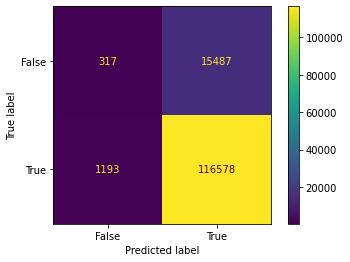

In [48]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels= [False, True])

cm_display.plot()
plt.show()